In [1]:
from numpy import * 
import pandas as pd
import operator
import matplotlib.pyplot as plt

In [23]:
X_train = pd.read_csv("train.csv")

In [24]:
Y_train = X_train.pop("label")

In [4]:
X_train_array = X_train.values

In [5]:
def display(n):
    for i in range(len(Y_train)):
        if(Y_train.values[i]==n):
            plt.imshow(X_train_array[i,:].reshape(28,28),cmap ='gray')
            plt.show()
            break
#1b   

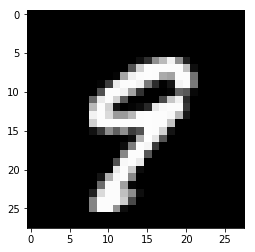

In [296]:
display(9)#1b 

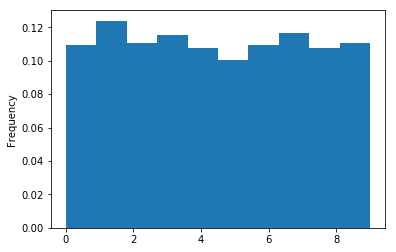

In [149]:
plt.hist(Y_train,normed=1)
plt.ylabel('Frequency');
plt.show()
#1c

In [8]:
index = []
for i in range(10):
    for j in range(100):
        if(Y_train[j]==i):
            index.append(j)
            break

In [11]:

def dist(x,y):   
    return sqrt(sum((x-y)**2))

res_index = []

for i in range(10):
    m = 100000;
    l = 0;
    for j in range(len(Y_train)):
        dis = dist(X_train.values[index[i]], X_train.values[j])
    
        if(dis<m and index[i]!=j):
            m = dis
            l = j
    res_index.append(l)

In [12]:
Y_train[index]#real label 1d

1     0
0     1
16    2
7     3
3     4
8     5
21    6
6     7
10    8
11    9
Name: label, dtype: int64

In [13]:
Y_train[res_index]# nearest label *3 is the only erroneous one 1d

12950    0
29704    1
9536     2
8981     5
14787    4
30073    5
16240    6
15275    7
32586    8
35742    9
Name: label, dtype: int64

In [14]:
index_0_1 = []
for i in range(len(Y_train)):
    if(Y_train[i]==0 or Y_train[i]==1):
        index_0_1.append(i)
#get index of number 0 and 1

In [17]:
#1j
def myKNN(sample, X_train, Y_train, k):  
    num_sample = X_train.shape[0] # shape[0] stands for the num of row  
    
    ## step 1: calculate Euclidean distance  
    # tile(A, reps): Construct an array by repeating A reps times  
    # the following copy numSamples rows for X_train  
    diff = tile(sample, (num_sample, 1)) - X_train # Subtract element-wise  
    squared_diff = diff ** 2 # squared for the subtract  
    squared_dist = sum(squared_diff, axis = 1) # sum is performed by row  
    distance = squared_dist ** 0.5  
    
    ## step 2: sort the distance  
    # argsort() returns the indices that would sort an array in a ascending order  
    sortedDistIndices = argsort(distance)  
  
    classCount = {} # define a dictionary (can be append element)  
    for i in range(k):  
        ## step 3: choose the min k distance  
        voteLabel = Y_train[sortedDistIndices[i]]  
  
        ## step 4: count the times Y_train occur  
        # when the key voteLabel is not in dictionary classCount, get()  
        # will return 0  
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1  
  
    ## step 5: the max voted class will return  
    maxCount = 0  
    for key, value in classCount.items():  
        if value > maxCount:  
            maxCount = value  
            maxIndex = key  
  
    return maxIndex  

In [59]:
distance = array([])# 1e
for i in range(len(index_0_1)):
    distance = concatenate((distance,myKNNChange(X_train.values[index_0_1][i],X_train.values[index_0_1][i:],Y_train.values[index_0_1][i:])))

In [90]:
X_label = array([])#1e
length = len(index_0_1)
for i in range(len(index_0_1)):
    X_label = concatenate((X_label,full(length-i,Y_train.values[index_0_1][i],dtype=int)))

In [179]:
Y_label = array([])#1e
length = len(index_0_1)
for i in range(length):
    Y_label = concatenate((Y_label,Y_train.values[index_0_1][arange(i,length)]))

In [180]:
Y_label.shape

(38865336,)

(38865336,)

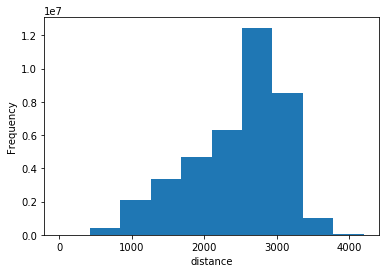

In [152]:
plt.hist(distance)#1e
plt.ylabel('Frequency')
plt.xlabel('distance')
plt.show()

In [188]:
a

19511048

In [189]:
def getRoc(x, y, distances, threshold):
    tp = 0
    fp = 0
    for i in range(len(x)):
        if(distances[i]<threshold):
            if(x[i]==y[i]):
                tp = tp+1
            else:
                fp = fp+1
    return array([[tp/a, fp/b]])

In [185]:
a = 0
b = 0
for i in range(len(X_label)):
    if(X_label[i]==Y_label[i]):
        a=a+1
    else:
        b=b+1
#get total number of genuine and impostor points

In [191]:
Roc_points = empty((0,2))
test_dis = 1500
for i in range(20):
    Roc_points = append(Roc_points, getRoc(X_label, Y_label,distance,test_dis+i*150 ), axis = 0)
#get roc points



#getRoc(X_label, Y_label,distance,5000 )

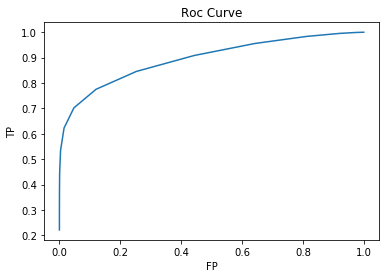

In [200]:
Roc_points[:,1]#1f
plt.plot(Roc_points[:,1], Roc_points[:,0])
plt.title('Roc Curve')
plt.xlabel('FP')
plt.ylabel('TP')
plt.show()

In [ ]:
#error_rate,confuse_matrix  = threeFoldKNN(X_train, 5)

In [220]:
fold1_test = X_train.values[0:14000]
fold2_test = X_train.values[14000:28000]
fold3_test = X_train.values[28000:42000]

fold1_trainX = X_train.values[14000:42000]
fold2_trainX = concatenate((X_train.values[0:14000],X_train.values[28000:42000]))
fold3_trainX = X_train.values[0:28000]

fold1_trainY = Y_train.values[14000:42000]
fold2_trainY = concatenate((Y_train.values[0:14000],Y_train.values[28000:42000]))
fold3_trainY = Y_train.values[0:28000]

In [227]:
fold3_trainY.shape

(28000,)

In [230]:
confuse_matrix = zeros((10,10))
error_rate = []
length = int(X_train.values.shape[0]/3)

In [235]:
time1 = 0
for i in range(length):
    test_label = myKNN(fold1_test[i], fold1_trainX, fold1_trainY, 5)
    if(Y_train[i]==test_label):
                time1 += 1
    confuse_matrix[Y_train[i]][test_label] += 1
    

In [240]:
confuse_matrix2 = confuse_matrix
time2 = 0
for i in range(length):
    test_label = myKNN(fold2_test[i], fold2_trainX, fold2_trainY, 5)
    if(Y_train[i+14000]==test_label):
                time2 += 1
    confuse_matrix2[Y_train[i+14000]][test_label] += 1

In [245]:
time2

13504

In [246]:
confuse_matrix3 = confuse_matrix2
time3 = 0
for i in range(length):
    test_label = myKNN(fold3_test[i], fold3_trainX, fold3_trainY, 5)
    if(Y_train[i+28000]==test_label):
                time3 += 1
    confuse_matrix3[Y_train[i+28000]][test_label] += 1

In [251]:
confuse_matrix3

array([[  4.10700000e+03,   1.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.00000000e+00,
          1.30000000e+01,   3.00000000e+00,   1.00000000e+00,
          2.00000000e+00],
       [  0.00000000e+00,   4.66000000e+03,   9.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   8.00000000e+00,   1.00000000e+00,
          3.00000000e+00],
       [  2.90000000e+01,   5.20000000e+01,   3.97200000e+03,
          1.70000000e+01,   3.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   8.30000000e+01,   1.10000000e+01,
          5.00000000e+00],
       [  3.00000000e+00,   1.10000000e+01,   2.60000000e+01,
          4.19200000e+03,   0.00000000e+00,   4.70000000e+01,
          3.00000000e+00,   2.70000000e+01,   2.70000000e+01,
          2.00000000e+01],
       [  2.00000000e+00,   4.90000000e+01,   0.00000000e+00,
          0.00000000e+00,   3.90000000e+03,   0.00000000e+00,
          1.60000000e+01

In [261]:
average_error = (time1+time2+time3)/len(X_train)

In [262]:
average_error#1h

0.9655952380952381

In [259]:
confuse_matrix45=array(confuse_matrix4,dtype=int32)  

In [260]:
confuse_matrix45#1i

array([[4102,    1,    4,    0,    0,    6,   13,    3,    1,    2],
       [   0, 4656,    9,    1,    2,    1,    3,    8,    1,    3],
       [  29,   52, 3969,   17,    3,    4,    4,   83,   11,    5],
       [   3,   11,   26, 4187,    0,   47,    3,   27,   27,   20],
       [   2,   49,    0,    0, 3899,    0,   16,    8,    2,   96],
       [  10,    5,    1,   63,    3, 3627,   50,    5,    6,   25],
       [  22,    7,    1,    0,    4,   18, 4084,    0,    1,    0],
       [   2,   59,   11,    3,   11,    0,    0, 4267,    0,   48],
       [  14,   47,   14,   62,   14,   65,   20,   13, 3765,   49],
       [  14,    9,    3,   31,   41,    9,    2,   66,   14, 3999]])

In [263]:
sum(confuse_matrix45[0])

4132

In [273]:
confuse_matrix_rate = zeros((10,10))
for i in range(10):
    for j in range(10):
        confuse_matrix_rate[j][i] = round(confuse_matrix45[j][i]/sum(confuse_matrix45[i]),3)

In [274]:
confuse_matrix_rate

array([[ 0.993,  0.   ,  0.001,  0.   ,  0.   ,  0.002,  0.003,  0.001,
         0.   ,  0.   ],
       [ 0.   ,  0.994,  0.002,  0.   ,  0.   ,  0.   ,  0.001,  0.002,
         0.   ,  0.001],
       [ 0.007,  0.011,  0.95 ,  0.004,  0.001,  0.001,  0.001,  0.019,
         0.003,  0.001],
       [ 0.001,  0.002,  0.006,  0.962,  0.   ,  0.012,  0.001,  0.006,
         0.007,  0.005],
       [ 0.   ,  0.01 ,  0.   ,  0.   ,  0.958,  0.   ,  0.004,  0.002,
         0.   ,  0.023],
       [ 0.002,  0.001,  0.   ,  0.014,  0.001,  0.956,  0.012,  0.001,
         0.001,  0.006],
       [ 0.005,  0.001,  0.   ,  0.   ,  0.001,  0.005,  0.987,  0.   ,
         0.   ,  0.   ],
       [ 0.   ,  0.013,  0.003,  0.001,  0.003,  0.   ,  0.   ,  0.97 ,
         0.   ,  0.011],
       [ 0.003,  0.01 ,  0.003,  0.014,  0.003,  0.017,  0.005,  0.003,
         0.927,  0.012],
       [ 0.003,  0.002,  0.001,  0.007,  0.01 ,  0.002,  0.   ,  0.015,
         0.003,  0.955]])

In [275]:
confuse_matrix_rate_df = pd.DataFrame(confuse_matrix_rate)  

In [276]:
confuse_matrix_rate_df#from the dataframe, 8 is the most difficult one to recognize

,0,1,2,3,4,5,6,7,8,9
0,0.993,0.000,0.001,0.000,0.000,0.002,0.003,0.001,0.000,0.000
1,0.000,0.994,0.002,0.000,0.000,0.000,0.001,0.002,0.000,0.001
2,0.007,0.011,0.950,0.004,0.001,0.001,0.001,0.019,0.003,0.001
3,0.001,0.002,0.006,0.962,0.000,0.012,0.001,0.006,0.007,0.005
4,0.000,0.010,0.000,0.000,0.958,0.000,0.004,0.002,0.000,0.023
5,0.002,0.001,0.000,0.014,0.001,0.956,0.012,0.001,0.001,0.006
6,0.005,0.001,0.000,0.000,0.001,0.005,0.987,0.000,0.000,0.000
7,0.000,0.013,0.003,0.001,0.003,0.000,0.000,0.970,0.000,0.011
8,0.003,0.010,0.003,0.014,0.003,0.017,0.005,0.003,0.927,0.012
9,0.003,0.002,0.001,0.007,0.010,0.002,0.000,0.015,0.003,0.955


In [277]:
X_test = pd.read_csv("test.csv")

In [278]:
X_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [281]:
Y_test = zeros((len(X_test)))

In [283]:
for i in range(len(X_test)):
    Y_test[i] = myKNN(X_test.values[i], X_train.values, Y_train.values, 10)



In [284]:
Y_test.shape

(28000,)

In [286]:
index = arange(1, 28001)
result= pd.DataFrame(Y_test,columns=['Label'])
result.insert(0,'ImageId',index)

result.to_csv('KNN.csv',index= False)#1j